<a href="https://colab.research.google.com/github/Novadotgg/AQI/blob/main/AQIregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/drive/MyDrive/merged ddup.csv')
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
from sklearn.metrics import *
df.head()

<ipython-input-2-1f7450222cf5>:11: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/content/drive/MyDrive/merged ddup.csv')


,State,City,Station,From Date,To Date,Ozone,CO,SO2,NO2,PM10,PM2.5,AQI,AQI Bucket
0,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",01-08-2021 00:00,02-08-2021 00:00,21.85,0.35,10.97,6.65,20.35,5.46,NaN,NaN
1,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",02-08-2021 00:00,03-08-2021 00:00,23.57,0.39,11.88,7.20,24.83,7.07,NaN,NaN
2,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",03-08-2021 00:00,04-08-2021 00:00,22.4,0.35,11.86,8.41,28.16,6.96,NaN,NaN
3,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",04-08-2021 00:00,05-08-2021 00:00,20.71,0.41,11.49,7.60,20.86,5.09,NaN,NaN
4,Andhra Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",05-08-2021 00:00,06-08-2021 00:00,20.84,0.31,15.08,7.09,26.44,5.91,NaN,NaN


In [ ]:
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
df.describe()

,CO,NO2,PM10,PM2.5,AQI,AQI Bucket
count,194637.000000,196210.000000,195548.000000,197173.000000,0.0,0.0
mean,0.889014,26.163870,126.096532,58.302650,NaN,NaN
std,0.655517,25.376283,96.486306,54.067406,NaN,NaN
min,0.000000,0.010000,0.170000,0.050000,NaN,NaN
25%,0.470000,10.520000,56.380000,23.630000,NaN,NaN
50%,0.740000,19.420000,98.080000,41.680000,NaN,NaN
75%,1.120000,33.880000,167.240000,73.710000,NaN,NaN
max,11.400000,500.000000,1000.000000,985.000000,NaN,NaN


In [ ]:
df.columns

Index(['State', 'City', 'Station', 'From Date', 'To Date', 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5', 'AQI', 'AQI Bucket'],
      dtype='object')

In [ ]:
x=(df['PM10'].mean())
columns_to_fill = ['Ozone', 'CO', 'SO2', 'NO2', 'PM2.5']
df[columns_to_fill] = df[columns_to_fill].apply(pd.to_numeric, errors='coerce')
for column in columns_to_fill:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)
df['PM10'].fillna(x,inplace=True)
df.isnull().sum()

State              0
City               0
Station          505
From Date          0
To Date            0
Ozone              0
CO                 0
SO2                0
NO2                0
PM10               0
PM2.5              0
AQI           207196
AQI Bucket    207196
dtype: int64

In [ ]:
def PM10_subindex(x):
  if x<=50:
    return x
  elif x>50 and x<=100:
    return x
  elif x>100 and x<=250:
    return 100+(x-100)*100/150
  elif x>250 and x<=350:
    return 200+(x-250)
  elif x>350 and x<=430:
    return 300+(x-350)*100/80
  elif x>430:
    return 400+(x-430)*100/80
  else:
    return 0
df["PM10_Sub"]=df["PM10"].astype(int).apply(lambda x: PM10_subindex(x))

def PM25_subindex(x):
    if x <= 30:
        return x * 50 / 30
    elif x > 30 and x <= 60:
        return 50 + (x - 30) * 50 / 30
    elif x > 60 and x <= 90:
        return 100 + (x - 60) * 100 / 30
    elif x > 90 and x <= 120:
        return 200 + (x - 90) * 100 / 30
    elif x > 120 and x <= 250:
        return 300 + (x - 120) * 100 / 130
    elif x > 250:
        return 400 + (x - 250) * 100 / 130
    else:
        return 0

df["PM2.5_Sub"] = df["PM2.5"].astype(int).apply(lambda x: PM25_subindex(x))


# SO2 Sub-Index calculation
def SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x > 380 and x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x > 800 and x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

df["SO2_Sub"] = df["SO2"].astype(int).apply(lambda x: SO2_subindex(x))

# NOx Sub-Index calculation
def NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x > 40 and x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x > 80 and x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x > 180 and x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x > 280 and x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

df["NO2_Sub"] = df["NO2"].astype(int).apply(lambda x: NO2_subindex(x))


# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x > 1 and x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x > 2 and x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x > 10 and x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x > 17 and x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

df["CO_Sub"] = df["CO"].astype(int).apply(lambda x: get_CO_subindex(x))

# O3 Sub-Index calculation
def O3_subindex(x):
    if x <= 50:
        return x * 50 / 50
    elif x > 50 and x <= 100:
        return 50 + (x - 50) * 50 / 50
    elif x > 100 and x <= 168:
        return 100 + (x - 100) * 100 / 68
    elif x > 168 and x <= 208:
        return 200 + (x - 168) * 100 / 40
    elif x > 208 and x <= 748:
        return 300 + (x - 208) * 100 / 539
    elif x > 748:
        return 400 + (x - 400) * 100 / 539
    else:
        return 0

df["O3_Sub"] = df["Ozone"].astype(int).apply(lambda x: O3_subindex(x))

df["AQI"] = df["AQI"].fillna(round(df[["PM2.5_Sub", "PM10_Sub", "SO2_Sub", "NO2_Sub", "CO_Sub", "O3_Sub"]].max(axis = 1)))

<Axes: >

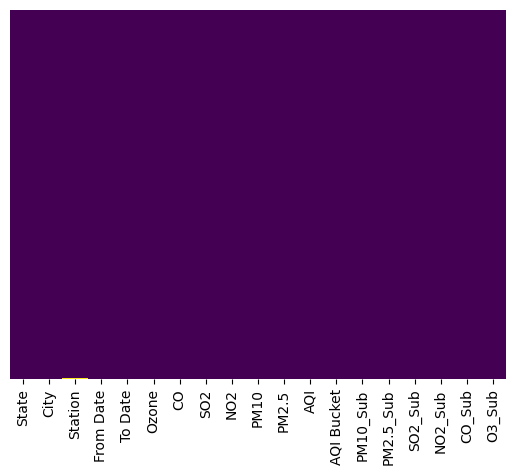

In [ ]:
def get_AQI_bucket(x):
    if x <= 50:
        return "Good"
    elif x > 50 and x <= 100:
        return "Satisfactory"
    elif x > 100 and x <= 200:
        return "Moderate"
    elif x > 200 and x <= 300:
        return "Poor"
    elif x > 300 and x <= 400:
        return "Very Poor"
    elif x > 400:
        return "Severe"
    else:
        return '0'

df["AQI Bucket"] = df["AQI Bucket"].fillna(df["AQI"].apply(lambda x: get_AQI_bucket(x)))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

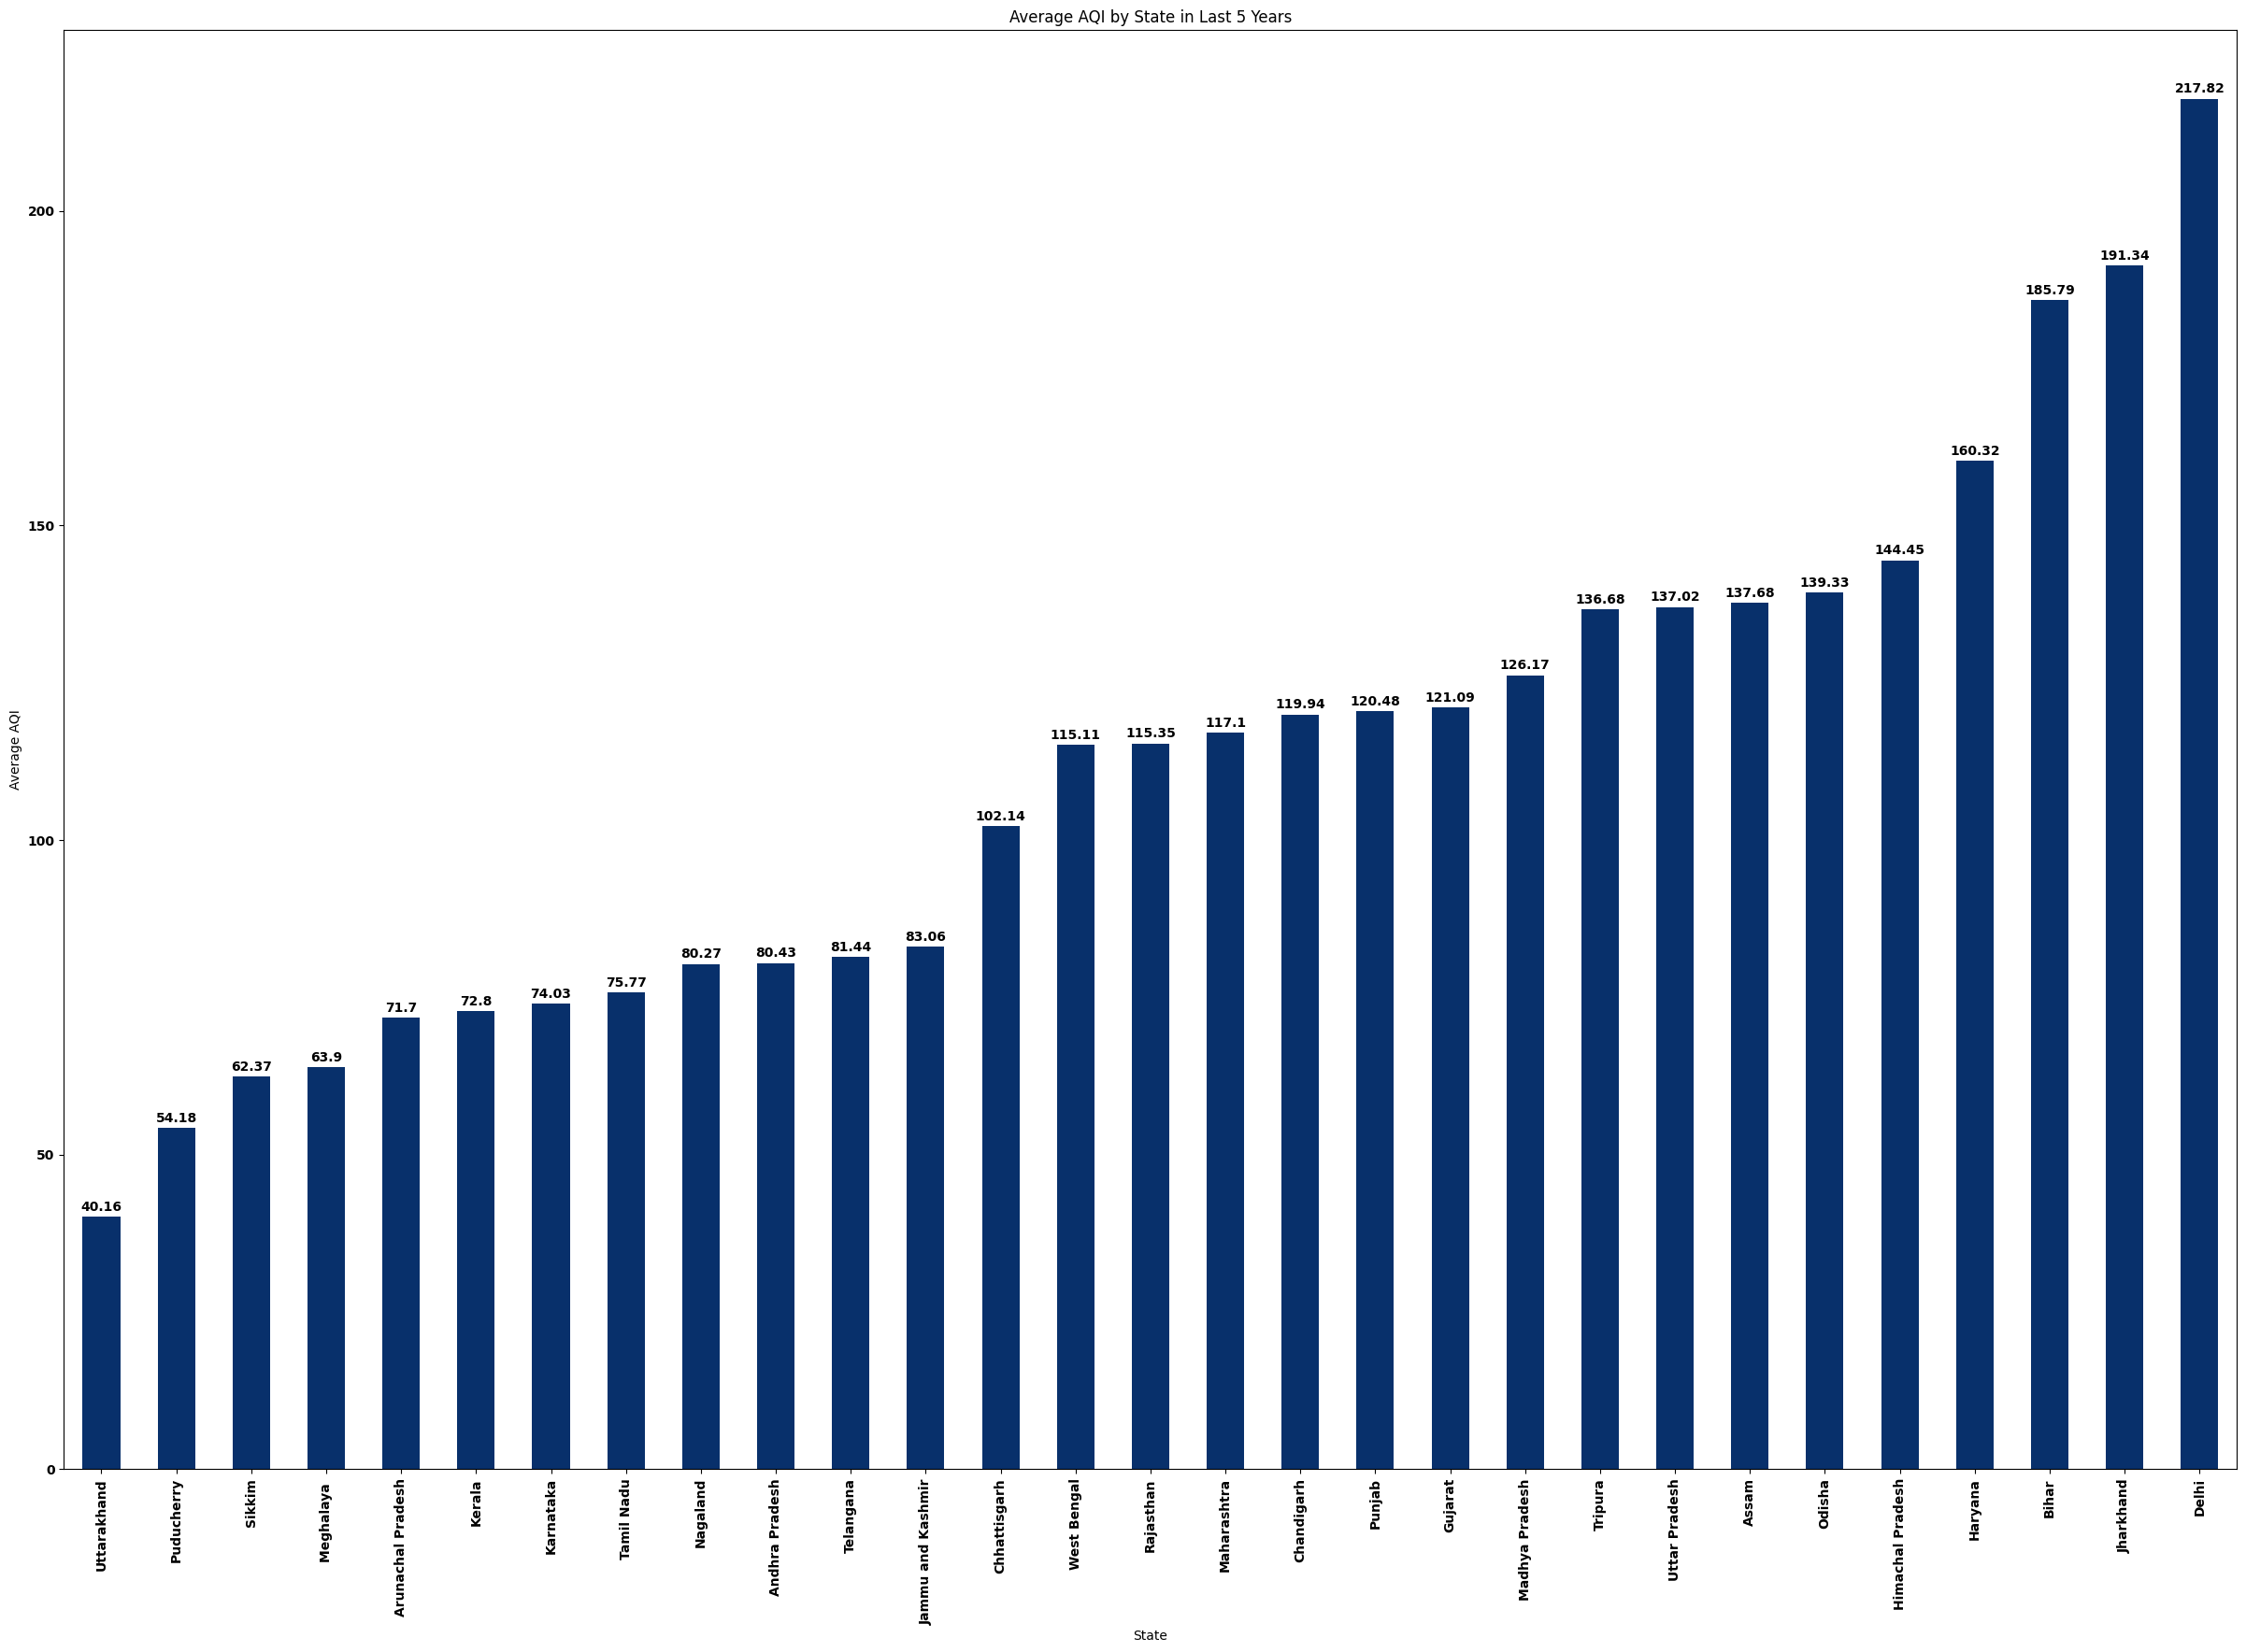

In [ ]:
mean_aqi_by_state = df.groupby('State')['AQI'].mean().sort_values()
ax = mean_aqi_by_state.plot(kind='bar', cmap='Blues_r', figsize=(30, 20))
for i, v in enumerate(mean_aqi_by_state):
    ax.text(i, v + 0.5, str(round(v, 2)), ha='center', va='bottom', fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.title('Average AQI by State in Last 5 Years')
plt.xlabel('State')
plt.ylabel('Average AQI')

plt.show()

In [ ]:
features=df[[ 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5']]
labels=df['AQI']
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder, StandardScaler
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout
# from tensorflow.keras.utils import to_categorical
# features = df[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']]
# labels = df['AQI Bucket']

In [ ]:
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# import tensorflow as tf
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(features)
# label_encoder = LabelEncoder()
# y_encoded = label_encoder.fit_transform(labels)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)
# y_train_one_hot = tf.keras.utils.to_categorical(y_train)
# y_test_one_hot = tf.keras.utils.to_categorical(y_test)

In [ ]:
# #MLP
# def build_mlp(input_shape, num_classes):
#     model = tf.keras.Sequential([
#         tf.keras.layers.Dense(64, input_shape=input_shape, activation='relu'),
#         tf.keras.layers.Dense(32, activation='relu'),
#         tf.keras.layers.Dense(num_classes, activation='softmax')
#     ])
#     return model

# mlp_model = build_mlp((X_train.shape[1],), y_train_one_hot.shape[1])
# mlp_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# mlp_model.fit(X_train, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2)
# mlp_loss, mlp_accuracy = mlp_model.evaluate(X_test, y_test_one_hot)
# print(f"MLP Test Accuracy: {mlp_accuracy}")

In [ ]:
# from sklearn.metrics import accuracy_score
# y_pred_mlp= mlp_model.predict(X_test)
# y_pred_mlp_acc = tf.argmax(y_pred_mlp, axis=1).numpy()
# mlp_accuracy=accuracy_score(y_test,y_pred_mlp_acc)
# print(mlp_accuracy)

In [ ]:
# #CNN
# import numpy as np
# X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test_cnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# def build_cnn(input_shape, num_classes):
#     model = tf.keras.Sequential([
#         tf.keras.layers.Conv1D(32, kernel_size=2, activation='relu', input_shape=input_shape),
#         tf.keras.layers.MaxPooling1D(pool_size=2),
#         tf.keras.layers.Flatten(),
#         tf.keras.layers.Dense(64, activation='relu'),
#         tf.keras.layers.Dense(num_classes, activation='softmax')
#     ])
#     return model

# cnn_model = build_cnn((X_train_cnn.shape[1], 1), y_train_one_hot.shape[1])
# cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# cnn_model.fit(X_train_cnn, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2)
# cnn_loss, cnn_accuracy = cnn_model.evaluate(X_test_cnn, y_test_one_hot)
# print(f"CNN Test Accuracy: {cnn_accuracy}")

In [ ]:
# from sklearn.metrics import accuracy_score
# y_pred_cnn= cnn_model.predict(X_test)
# y_pred_cnn_acc = tf.argmax(y_pred_mlp, axis=1).numpy()
# cnn_accuracy=accuracy_score(y_test,y_pred_cnn_acc)
# print(mlp_accuracy)

In [ ]:
# # Reshape the data for RNN
# X_train_rnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_test_rnn = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# def build_rnn(input_shape, num_classes):
#     model = tf.keras.Sequential([
#         tf.keras.layers.SimpleRNN(50, activation='relu', input_shape=input_shape),
#         tf.keras.layers.Dense(32, activation='relu'),
#         tf.keras.layers.Dense(num_classes, activation='softmax')
#     ])
#     return model

# rnn_model = build_rnn((X_train_rnn.shape[1], 1), y_train_one_hot.shape[1])
# rnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# rnn_model.fit(X_train_rnn, y_train_one_hot, epochs=50, batch_size=32, validation_split=0.2)
# rnn_loss, rnn_accuracy = rnn_model.evaluate(X_test_rnn, y_test_one_hot)
# print(f"RNN Test Accuracy: {rnn_accuracy}")




---



---



---



---



---



In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(features,labels,random_state=99)
from sklearn.preprocessing import StandardScaler

In [ ]:
# features = df[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']].values
# labels = df['AQI'].values

In [ ]:
# scaler = StandardScaler()
# features_scaled = scaler.fit_transform(features)

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
#Feed foreward
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
modelff = Sequential()
modelff.add(Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
modelff.add(Dense(32, activation='relu'))
modelff.add(Dense(1))
modelff.compile(optimizer='adam', loss='mean_squared_error')
modelff.fit(X_train_scaled, y_train, epochs=50, batch_size=32, validation_split=0.2)
loss = modelff.evaluate(X_test_scaled, y_test)
print(f'Test Loss: {loss}')
predictions = modelff.predict(X_test_scaled)
mse_ff = mean_squared_error(y_test, predictions)
mae_ff = mean_absolute_error(y_test, predictions)
r2_ff = r2_score(y_test, predictions)
print(f'Mean Squared Error: {mse_ff}')
print(f'Mean Squared Error: {mae_ff}')
print(f'R-squared: {r2_ff}')

Epoch 1/50
4144/4144 [==============================] - 11s 2ms/step - loss: 1655.7896 - val_loss: 386.2449
Epoch 2/50
4144/4144 [==============================] - 10s 2ms/step - loss: 238.5515 - val_loss: 82.6771
Epoch 3/50
4144/4144 [==============================] - 8s 2ms/step - loss: 43.4714 - val_loss: 29.2124
Epoch 4/50
4144/4144 [==============================] - 10s 2ms/step - loss: 23.2510 - val_loss: 20.2971
Epoch 5/50
4144/4144 [==============================] - 10s 2ms/step - loss: 18.1231 - val_loss: 15.6941
Epoch 6/50
4144/4144 [==============================] - 9s 2ms/step - loss: 15.4389 - val_loss: 14.6559
Epoch 7/50
4144/4144 [==============================] - 11s 3ms/step - loss: 13.7874 - val_loss: 12.5858
Epoch 8/50
4144/4144 [==============================] - 9s 2ms/step - loss: 12.6315 - val_loss: 14.3758
Epoch 9/50
4144/4144 [==============================] - 8s 2ms/step - loss: 11.8139 - val_loss: 11.2696
Epoch 10/50
4144/4144 [==============================] 

In [ ]:
X_train_scaled
X_test_scaled

array([[-0.73305713,  0.15773942, -0.87257234,  0.41861479,  0.52729656,
         0.41796111],
       [-0.22314683,  0.59758235, -0.75548259, -0.05204079, -0.66738799,
        -0.7449667 ],
       [-0.12680882,  0.01636133,  0.2608259 ,  0.172158  , -0.61663202,
        -0.32833319],
       ...,
       [-0.32289074, -0.23497749, -0.41110095, -0.06903781, -0.90016167,
        -0.73376279],
       [ 1.46033562,  0.99029926,  1.33223544,  0.95968659,  1.47012062,
         1.16615438],
       [-0.70970246, -0.69052911, -0.3230923 , -0.58704222, -0.20312018,
        -0.2394615 ]])

In [ ]:
#CNN
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

modelcn = Sequential()
modelcn.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
modelcn.add(MaxPooling1D(pool_size=2))
modelcn.add(Flatten())
modelcn.add(Dense(64, activation='relu'))
modelcn.add(Dense(1))
modelcn.compile(optimizer='adam', loss='mean_squared_error')
modelcn.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)

predictions = modelcn.predict(X_test_reshaped)
mse_cnn = mean_squared_error(y_test, predictions)
mae_cnn = mean_absolute_error(y_test, predictions)
r2_cnn = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse_cnn}')
print(f'Mean Absolute Error (MAE): {mae_cnn}')
print(f'R-squared (R2): {r2_cnn}')


Epoch 1/50
4144/4144 [==============================] - 13s 3ms/step - loss: 1354.6079 - val_loss: 401.8248
Epoch 2/50
4144/4144 [==============================] - 11s 3ms/step - loss: 361.9942 - val_loss: 352.5363
Epoch 3/50
4144/4144 [==============================] - 9s 2ms/step - loss: 327.4060 - val_loss: 360.4702
Epoch 4/50
4144/4144 [==============================] - 11s 3ms/step - loss: 305.5833 - val_loss: 313.1043
Epoch 5/50
4144/4144 [==============================] - 11s 3ms/step - loss: 288.4583 - val_loss: 305.8203
Epoch 6/50
4144/4144 [==============================] - 12s 3ms/step - loss: 276.0689 - val_loss: 282.4654
Epoch 7/50
4144/4144 [==============================] - 10s 2ms/step - loss: 268.0673 - val_loss: 280.7375
Epoch 8/50
4144/4144 [==============================] - 11s 3ms/step - loss: 260.7592 - val_loss: 268.8610
Epoch 9/50
4144/4144 [==============================] - 11s 3ms/step - loss: 251.1254 - val_loss: 247.1310
Epoch 10/50
4144/4144 [==============

In [ ]:
#RNN(LSTM)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], X_test_scaled.shape[1], 1))
modelrn = Sequential()
modelrn.add(LSTM(50, input_shape=(X_train.shape[1], 1)))
modelrn.add(Dense(1))

modelrn.compile(optimizer='adam', loss='mean_squared_error')
modelrn.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, validation_split=0.2)
predictions = modelrn.predict(X_test_reshaped)
mse_rnn = mean_squared_error(y_test, predictions)
mae_rnn = mean_absolute_error(y_test, predictions)
r2_rnn = r2_score(y_test, predictions)

print(f'Mean Squared Error (MSE): {mse_rnn}')
print(f'Mean Absolute Error (MAE): {mae_rnn}')
print(f'R-squared (R2): {r2_rnn}')

Epoch 1/50
4144/4144 [==============================] - 28s 6ms/step - loss: 12720.3145 - val_loss: 6172.2275
Epoch 2/50
4144/4144 [==============================] - 29s 7ms/step - loss: 3092.8555 - val_loss: 1460.3621
Epoch 3/50
4144/4144 [==============================] - 24s 6ms/step - loss: 807.2780 - val_loss: 538.0009
Epoch 4/50
4144/4144 [==============================] - 32s 8ms/step - loss: 370.2974 - val_loss: 312.3401
Epoch 5/50
4144/4144 [==============================] - 27s 7ms/step - loss: 212.9207 - val_loss: 200.8534
Epoch 6/50
4144/4144 [==============================] - 27s 7ms/step - loss: 135.7575 - val_loss: 143.3351
Epoch 7/50
4144/4144 [==============================] - 24s 6ms/step - loss: 94.8287 - val_loss: 113.7756
Epoch 8/50
4144/4144 [==============================] - 27s 6ms/step - loss: 70.9382 - val_loss: 89.8614
Epoch 9/50
4144/4144 [==============================] - 26s 6ms/step - loss: 55.9281 - val_loss: 82.0529
Epoch 10/50
4144/4144 [==============

In [ ]:
print(r2_cnn)
print(r2_ff)
print(r2_rnn)


0.9917177839170491
0.9994457123211282
0.999577541218464


In [ ]:
accuracy={
    'CNN':r2_cnn,
    'FNN':r2_ff,
    'RNN':r2_rnn
}
max_accuracy = max(accuracy.values())
best_model = [model for model, accuracy in accuracy.items() if accuracy == max_accuracy][0]

print(best_model, max_accuracy)

RNN 0.999577541218464


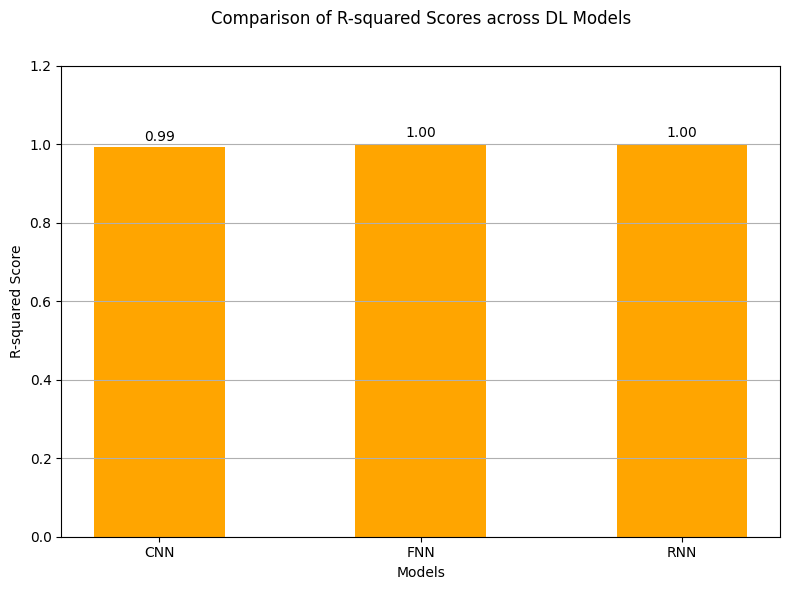

In [ ]:
import matplotlib.pyplot as plt
models = ['CNN', 'FNN', 'RNN']
# mae_scores = [mae_cnn, mae_ff, mae_rnn]
# mse_scores = [mse_cnn, mse_ff, mse_rnn]
r2_scores = [r2_cnn, r2_ff, r2_rnn]

fig, ax = plt.subplots(figsize=(8, 6))
bar_width = 0.5
bar_positions = np.arange(len(models))
r2_bars = ax.bar(bar_positions, r2_scores, width=bar_width, color='orange')
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, '{:.2f}'.format(yval), ha='center', va='bottom')

add_value_labels(r2_bars)
ax.set_xlabel('Models')
ax.set_ylabel('R-squared Score')
ax.set_title('Comparison of R-squared Scores across DL Models',pad=30)
ax.set_xticks(bar_positions)
ax.set_xticklabels(models)
ax.set_ylim(0, 1.2)
ax.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
import joblib
joblib.dump(modelrn, 'dlaqi.pkl')
from google.colab import files
files.download('dlaqi.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#CNN
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

In [ ]:
# X_train_cnn = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
# X_val_cnn = X_val.reshape(X_val.shape[0], X_val.shape[1], 1)
# model_cnn = Sequential()
# model_cnn.add(Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
# model_cnn.add(MaxPooling1D(pool_size=2))
# model_cnn.add(Conv1D(64, kernel_size=3, activation='relu'))
# model_cnn.add(MaxPooling1D(pool_size=2))
# model_cnn.add(Flatten())
# model_cnn.add(Dense(128, activation='relu'))
# model_cnn.add(Dense(1))

FNN (Feed Foreward Neural Network)


In [ ]:
#FNN
# df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
df.columns

Index(['State', 'City', 'Station', 'From Date', 'To Date', 'Ozone', 'CO',
       'SO2', 'NO2', 'PM10', 'PM2.5', 'AQI', 'AQI Bucket', 'PM10_Sub',
       'PM2.5_Sub', 'SO2_Sub', 'NO2_Sub', 'CO_Sub', 'O3_Sub'],
      dtype='object')

In [ ]:
# X = df[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']].values
# y = df['AQI'].values

In [ ]:

# scaler = StandardScaler()
# X = scaler.fit_transform(X)
# # Split into training (70%) and temporary (30%) data
# X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# # Split temporary data into validation (15%) and test (15%) sets
# X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [ ]:
# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'X_val shape: {X_val.shape}')
# print(f'y_val shape: {y_val.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}')

In [ ]:
# #classification
# # #tensorflow for feedforeward
# # import tensorflow as tf
# # from tensorflow.keras.models import Sequential
# # from tensorflow.keras.layers import Dense

# # # Define the model
# # model = Sequential([
# #     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
# #     Dense(64, activation='relu'),
# #     Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
# # ])

# # # Compile the model
# # model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
# #regression
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense

# # Define the model
# model = Sequential([
#     Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
#     Dense(64, activation='relu'),
#     Dense(1)  # Output layer for regression
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# # Display the model's architecture
# model.summary()


In [ ]:
# #training
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val))

In [ ]:
# # Evaluate the model
# test_loss, test_mae = model.evaluate(X_test, y_test)
# print(f'Test MAE: {test_mae}')


In [ ]:
# # Make predictions
# predictions = model.predict(X_test)


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Define callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model with callbacks
# history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val),
#                     callbacks=[early_stopping])


In [ ]:
# # Evaluate the model
# test_loss, test_accuracy = model.evaluate(X_test, y_test)
# print(f'Test accuracy: {test_accuracy}')


In [ ]:
# model.summary()

LSTM

In [ ]:
# #lstm
# X = df[['Ozone', 'CO', 'SO2', 'NO2', 'PM10', 'PM2.5']].values
# y = df['AQI'].values

In [ ]:
# scaler = StandardScaler()
# X = scaler.fit_transform(X)

# def create_sequences(X, y, time_steps=10):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         Xs.append(X[i:(i + time_steps)])
#         ys.append(y[i + time_steps])
#     return np.array(Xs), np.array(ys)

# time_steps = 10
# X_seq, y_seq = create_sequences(X, y, time_steps)

# # Split into training, validation, and test sets
# split_1 = int(0.7 * len(X_seq))
# split_2 = int(0.85 * len(X_seq))

# X_train, y_train = X_seq[:split_1], y_seq[:split_1]
# X_val, y_val = X_seq[split_1:split_2], y_seq[split_1:split_2]
# X_test, y_test = X_seq[split_2:], y_seq[split_2:]

In [ ]:
# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'X_val shape: {X_val.shape}')
# print(f'y_val shape: {y_val.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}')

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense

# # Define the LSTM model
# model = Sequential([
#     LSTM(64, activation='relu', input_shape=(time_steps, X_train.shape[2])),
#     Dense(1)  # Output layer for regression
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# # Display the model's architecture
# model.summary()


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Define callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
#                     callbacks=[early_stopping])


In [ ]:
# # Evaluate the model
# test_loss, test_mae = model.evaluate(X_test, y_test)
# print(f'Test MAE: {test_mae}')


In [ ]:
# # Make predictions
# predictions = model.predict(X_test)


CNN

In [ ]:
# #CNN
# def create_sequences(X, y, time_steps=10):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         Xs.append(X[i:(i + time_steps)])
#         ys.append(y[i + time_steps])
#     return np.array(Xs), np.array(ys)

# time_steps = 10
# X_seq, y_seq = create_sequences(X, y, time_steps)

# # Split into training, validation, and test sets
# split_1 = int(0.7 * len(X_seq))
# split_2 = int(0.85 * len(X_seq))

# X_train, y_train = X_seq[:split_1], y_seq[:split_1]
# X_val, y_val = X_seq[split_1:split_2], y_seq[split_1:split_2]
# X_test, y_test = X_seq[split_2:], y_seq[split_2:]

In [ ]:
# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'X_val shape: {X_val.shape}')
# print(f'y_val shape: {y_val.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}')

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# # Define the 1D CNN model
# model = Sequential([
#     Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(time_steps, X_train.shape[2])),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(50, activation='relu'),
#     Dense(1)  # Output layer for regression
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# # Display the model's architecture
# model.summary()


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Define callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
#                     callbacks=[early_stopping])


In [ ]:
# # Evaluate the model
# test_loss, test_mae = model.evaluate(X_test, y_test)
# print(f'Test MAE: {test_mae}')


In [ ]:
# # Make predictions
# predictions = model.predict(X_test)


In [ ]:
# predictions

RNN

In [ ]:
# #RNN
# def create_sequences(X, y, time_steps=10):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         Xs.append(X[i:(i + time_steps)])
#         ys.append(y[i + time_steps])
#     return np.array(Xs), np.array(ys)

# time_steps = 10
# X_seq, y_seq = create_sequences(X, y, time_steps)

# # Split into training, validation, and test sets
# split_1 = int(0.7 * len(X_seq))
# split_2 = int(0.85 * len(X_seq))

# X_train, y_train = X_seq[:split_1], y_seq[:split_1]
# X_val, y_val = X_seq[split_1:split_2], y_seq[split_1:split_2]
# X_test, y_test = X_seq[split_2:], y_seq[split_2:]

In [ ]:
# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'X_val shape: {X_val.shape}')
# print(f'y_val shape: {y_val.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}')

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import SimpleRNN, Dense

# # Define the RNN model
# model = Sequential([
#     SimpleRNN(50, activation='relu', input_shape=(time_steps, X_train.shape[2])),
#     Dense(1)  # Output layer for regression
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# # Display the model's architecture
# model.summary()


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Define callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
#                     callbacks=[early_stopping])


In [ ]:
# # Evaluate the model
# test_loss, test_mae = model.evaluate(X_test, y_test)
# print(f'Test MAE: {test_mae}')


In [ ]:
# # Make predictions
# predictions = model.predict(X_test)


GRU (Gated Recurrent Unit)

In [ ]:
# #Gated Recurrent Unit(GRU)
# def create_sequences(X, y, time_steps=10):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         Xs.append(X[i:(i + time_steps)])
#         ys.append(y[i + time_steps])
#     return np.array(Xs), np.array(ys)

# time_steps = 10
# X_seq, y_seq = create_sequences(X, y, time_steps)

# # Split into training, validation, and test sets
# split_1 = int(0.7 * len(X_seq))
# split_2 = int(0.85 * len(X_seq))

# X_train, y_train = X_seq[:split_1], y_seq[:split_1]
# X_val, y_val = X_seq[split_1:split_2], y_seq[split_1:split_2]
# X_test, y_test = X_seq[split_2:], y_seq[split_2:]

In [ ]:
# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'X_val shape: {X_val.shape}')
# print(f'y_val shape: {y_val.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}')

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import GRU, Dense

# # Define the GRU model
# model = Sequential([
#     GRU(50, activation='relu', input_shape=(time_steps, X_train.shape[2])),
#     Dense(1)  # Output layer for regression
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# # Display the model's architecture
# model.summary()


In [ ]:
# from tensorflow.keras.callbacks import EarlyStopping

# # Define callbacks
# early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# # Train the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_val, y_val),
#                     callbacks=[early_stopping])


In [ ]:
# # Evaluate the model
# test_loss, test_mae = model.evaluate(X_test, y_test)
# print(f'Test MAE: {test_mae}')


In [ ]:
# # Make predictions
# predictions = model.predict(X_test)


TCN(Temporal Convolutional Networks) simple architecture than CNN

In [ ]:
# #Temporal Convolutional Networks (TCNs)
# def create_sequences(X, y, time_steps=10):
#     Xs, ys = [], []
#     for i in range(len(X) - time_steps):
#         Xs.append(X[i:(i + time_steps)])
#         ys.append(y[i + time_steps])
#     return np.array(Xs), np.array(ys)

# time_steps = 10
# X_seq, y_seq = create_sequences(X, y, time_steps)

# # Split into training, validation, and test sets
# split_1 = int(0.7 * len(X_seq))
# split_2 = int(0.85 * len(X_seq))

# X_train, y_train = X_seq[:split_1], y_seq[:split_1]
# X_val, y_val = X_seq[split_1:split_2], y_seq[split_1:split_2]
# X_test, y_test = X_seq[split_2:], y_seq[split_2:]

In [ ]:
# print(f'X_train shape: {X_train.shape}')
# print(f'y_train shape: {y_train.shape}')
# print(f'X_val shape: {X_val.shape}')
# print(f'y_val shape: {y_val.shape}')
# print(f'X_test shape: {X_test.shape}')
# print(f'y_test shape: {y_test.shape}')

In [ ]:
# #installing addons for tcn
# %pip install tensorflow-addons
# # %pip install tensorflow-addons


Error as the addons were not installed perfectly or can't be identified, that contains the TCN in line 4

In [ ]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense
# from tensorflow_addons.layers import TCN

# # Define the TCN model
# model = Sequential([
#     TCN(input_shape=(time_steps, X_train.shape[2])),
#     Dense(1)  # Output layer for regression
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# # Display the model's architecture
# model.summary()
